In [540]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import math
import pandas as pd
import os

In [541]:
# Generate random linear function
def rand_linear():
    # for horizontal, m = 0
    # m = random.uniform(-10, 10)
    MAX_SLOPE = 5 #adjust later
    m = random.uniform(-2, 2)
    b = random.uniform(-MAX_SLOPE, MAX_SLOPE)
    return [m,b]

# Generate random logarithmic function
def rand_log():
    a = random.uniform(-10, 10)
    b = random.uniform(0, 10)
    c = random.uniform(-10, 0)
    d = random.uniform(-10, 10)
    return [a,b,c,d]
    
def spacedpts(x, y, Nmarks):
    data_ratio = 1.0
    dydx = np.gradient(y, x[1])
    dxdx = np.gradient(x, x[1]) * data_ratio
    sqrts = []
    for i in range(len(dydx)):
        sqrts.append(math.sqrt(dydx[i]**2 + dxdx[i]**2))

    arclength = scipy.integrate.cumtrapz(sqrts, x, initial=0)
    marks = np.linspace(0, max(arclength), Nmarks)
    markx = np.interp(marks, arclength, x)
    marky = np.interp(markx, x, y)

    return markx, marky

def generate_xy (coeffs, lin_func):
    MAX_PEOPLE = 10 
    MIN_SPACING = 3
    MAX_SPACING = 5
    START = 0
    
    num_people = random.randrange(3, MAX_PEOPLE)
    num_points = num_people + 2
    spacing = random.uniform (MIN_SPACING, MAX_SPACING)
    start_x = random.uniform(-START, START)

    x = []
    y = []

    if lin_func:
        for i in range(num_points):
            x_offset = math.sqrt(spacing**2 / (coeffs[0]**2 + 1))
            x.append(start_x + i*x_offset)
        
        for i in range(num_points):
            # y = m * x + b
            y_val = (coeffs[0]*x[i] + coeffs[1])
            y.append(y_val)
    else:
        temp_x = np.linspace(0.01, 50, 100) 
        #print(coeffs)
        base_10 = random.randint(0,1)
        if base_10:
            temp_y = [coeffs[0] * math.log10(coeffs[1] * (e - coeffs[2])) + coeffs[3] for e in temp_x]
        else:
            temp_y = [coeffs[0] * math.log(coeffs[1] * (e - coeffs[2])) + coeffs[3] for e in temp_x]

        x,y = spacedpts (temp_x,temp_y, num_points)
        # fig2 = plt.figure(figsize=(5, 5))
        # ax2 = fig2.add_subplot()
        # ax2.set_xlim(-30,30)
        # ax2.set_ylim(-30,30)
        # ax2.set_xlabel('x')
        # ax2.set_ylabel('y')
        # plt.scatter(x, y)
        # plt.show()
        
    return x, y

def generate_orientations(x, y, flip):
    theta = []
    for i in range(1,len(x)):
        rand_angle = math.radians(random.uniform(-15,15))
        if (flip == 0):
            actual_theta = get_bearing(x[i], y[i], x[i-1], y[i-1])   
        else:
            actual_theta = get_bearing(x[i-1], y[i-1], x[i], y[i])
        theta.append(actual_theta + rand_angle)

    theta.append(theta[0] if flip == 0 else theta[-1])

    u = [math.cos(t) for t in theta] # pointing in +x direction
    v = [math.sin(t) for t in theta] # pointing in +y direction

    return u, v

# fewer extra points/limit on how close they are to the line
def add_extra_pts(_x, _y):
    MAX_SCATTERED = 20
    num_points = random.randrange(0, MAX_SCATTERED)
    for i in range(num_points):
        x = random.uniform(-60.0, 60.0)
        y = random.uniform(-60.0, 60.0)
        _x.append(x)
        _y.append(y)

    return _x,_y

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    return brng

def show_plot (x,y,u,v,i):
   
    show_3d = False
    show_2d = True
    
    if show_3d:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        ax.set_zlim(-1,1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.quiver(x, y, 0, u, v, 0, length=2, normalize=True, arrow_length_ratio=0.2)

    if show_2d:
        fig2 = plt.figure(figsize=(10, 10))
        ax2 = fig2.add_subplot()
        ax2.set_xlim(-75,75)
        ax2.set_ylim(-75,75)
        # ax2.set_xlabel('x')
        # ax2.set_ylabel('y')
        ax2.scatter(x,y)
        plt.axis('off')

        folder = '/Users/ashak/OneDrive/Documents/GitHub/line_model/inputs/'
        plt.savefig(folder + 'input_' + str(i) + '.png', facecolor='white', transparent=False)
                #fig.savefig(my_path + '/inputs/input_' + str(i) + '.png')

        plt.close(fig2)
        #ax2.quiver(x, y, u, v)

def generate_input_img(x,y,i):
    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot()
    ax2.set_xlim(-75,75)
    ax2.set_ylim(-75,75)
    ax2.scatter(x,y)
    plt.axis('off')
    folder = '/Users/ashak/OneDrive/Documents/GitHub/line_model/inputs/'
    plt.savefig(folder + 'input_' + str(i) + '.png', facecolor='white', transparent=False)
    plt.close(fig2)

def generate_output_img(x,y,i):
    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot()
    ax2.set_xlim(-75,75)
    ax2.set_ylim(-75,75)
    ax2.scatter(x,y)
    plt.axis('off')
    folder = '/Users/ashak/OneDrive/Documents/GitHub/line_model/outputs/'
    plt.savefig(folder + 'output_' + str(i) + '.png', facecolor='white', transparent=False)
    plt.close(fig2)

def generate_model_data(x,y,u,v,flip):

    trial = []

    if flip == 1:
        join_label = [x[0], y[0], u[0], v[0]]
        for i in range(1,len(x)):
            temp = [x[i], y[i], u[i], v[i]]
            trial.extend(temp)
    else:
        join_label = [x[-1], y[-1], u[-1], v[-1]]
        for i in range(len(x)-1):
            temp = [x[i], y[i], u[i], v[i]]
            trial.extend(temp)

    trial.extend([0] * (40 - len(trial)))

    return trial, join_label

def add_randomness(x,y):
    for i in range(0,len(x)-1):
        x[i] += random.uniform(-2, 2)
        y[i] += random.uniform(-1.5, 1.5)

KeyboardInterrupt: 

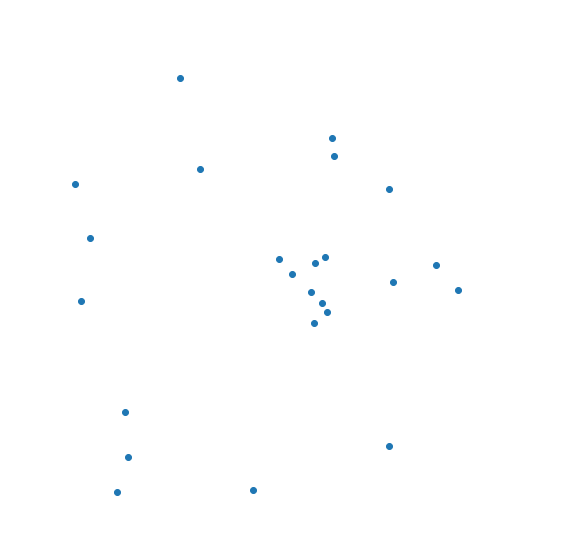

In [542]:
trials = 10000
model_input = []
model_expected_output = []
FIXED_SIZE = 80

for i in range(trials):
    # Randomly pick between linear and log function
    lin_func = random.randint(0, 1)
    coeffs = rand_linear () if lin_func else rand_log()

    # Determine x and y data for equidistant points on function
    x, y = generate_xy (coeffs, lin_func)

    # Go through and calculate orientations for all the points
    flip = random.randint (0, 1)
    u, v = generate_orientations (x,y,flip)

    # Go through the x and y and add random offsets to everything
    add_randomness (x,y)
    x = list(x)
    y = list(y)
    
    generate_output_img (x,y,i)
    x,y = add_extra_pts (x,y)
    generate_input_img (x,y,i)
    
    # trial, join_label = generate_model_data (x,y,u,v, flip)
    # model_input.extend(np.array(trial).reshape(1, 40))
    # model_expected_output.extend(np.array(join_label).reshape(1,2))

# np.savetxt('model_input.csv', model_input, delimiter=",")  
# np.savetxt('model_expected_output.csv', model_expected_output, delimiter=",")  